In [1]:
from numpy.random import standard_normal
from numpy import array, zeros, sqrt, shape
from pylab import *


# Model description and familiarization

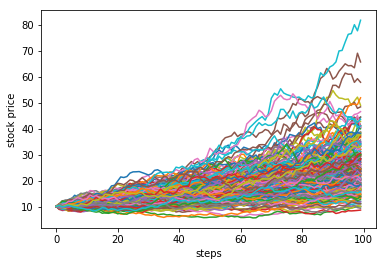

In [2]:

initial_stock_price = 10.222

terminal_time = 1
number_of_time_steps = 100
dt = terminal_time/number_of_time_steps
sigma = 0.4 
mu = 1  
number_of_simulation = 200


StockPrice = zeros([number_of_simulation, number_of_time_steps], dtype=float)
x = range(0, number_of_time_steps, 1)

for j in range(0, number_of_simulation, 1):
    
        StockPrice[j,0]= initial_stock_price
        
        for i in x[:-1]:
                StockPrice[j,i+1]  = StockPrice[j,i]  # previous value
                StockPrice[j,i+1] += StockPrice[j,i]*(mu-0.5*pow(sigma,2))*dt # drift
                StockPrice[j,i+1] += sigma*StockPrice[j,i]*sqrt(dt)*standard_normal(); # noise
                
        plot(x, StockPrice[j])

#title('Simulations %d Steps %d Sigma %.6f Mu %.6f S0 %.6f' % (int(number_of_simulation), number_of_time_steps, sigma, mu, S0))
xlabel('steps')
ylabel('stock price')
show()



In [3]:
StockPriceDrift = zeros(number_of_time_steps, dtype=float)
StockPriceDrift[0]= initial_stock_price

for i in x[:-1]:
    StockPriceDrift[i+1]  = StockPriceDrift[i]  # previous value
    StockPriceDrift[i+1] += StockPriceDrift[i]*(mu-0.5*pow(sigma,2))*dt # drift
 

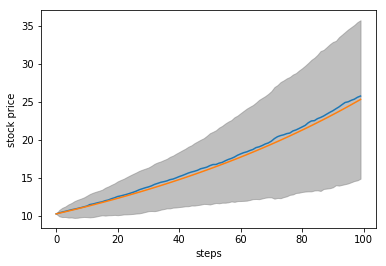

In [4]:
StockPriceMean = np.mean(StockPrice, axis=0)
StockPriceStandardError = np.sqrt(np.var(StockPrice, axis=0))

plot(x, StockPriceMean)
plot(x, StockPriceDrift)
fill_between(x, 
             StockPriceDrift - StockPriceStandardError, 
             StockPriceDrift + StockPriceStandardError, 
             color='grey', alpha='0.5')

xlabel('steps')
ylabel('stock price')
show()

# Extraction of model parameters from results

1. Compute log returns
2. Compute the volatility
3. Compute the drift

\begin{equation}
\alpha = 30\beta 
\end{equation}

In [5]:
volatilies_calculated = np.zeros(number_of_simulation ,dtype=float)
drifts_calculated = np.zeros(number_of_simulation ,dtype=float)

for simulation in range(number_of_simulation):
    
    log_returns = np.zeros(number_of_time_steps - 1,dtype=float)

    for time_step in range(1,number_of_time_steps - 1,1):
        log_returns[time_step] = np.log(StockPrice[simulation,time_step]/StockPrice[simulation,time_step-1] )
        
    volatilies_calculated[simulation] = np.sqrt(number_of_time_steps*np.var(log_returns))
    drifts_calculated[simulation] = number_of_time_steps*np.mean(log_returns)

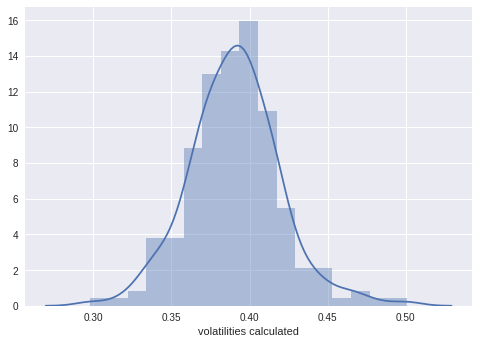

In [6]:
import seaborn as sns
import pandas as pd

data= pd.Series(volatilies_calculated, name = "volatilities calculated")
sns.distplot(data)
show()

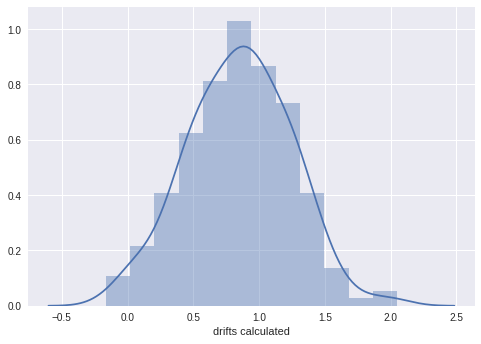

In [7]:
data = pd.Series(drifts_calculated, name = "drifts calculated")
sns.distplot(data)
plt.show()

# Betting with the Kelly criterion

In [46]:
probabilities_of_winning = np.linspace(0.1,1,10)
number_of_simulation = 10000
number_of_time_steps = 100
initial_bank_account = 100
expected_return = 10
terminal_bank_account_results = []
bank_account = 100
#print(bank_account)

probability_of_winning = 0.5
returns_factor = 2
#returns_if_win = 2*expected_return
#losses_if_lose = expected_return - returns_if_win*probabilities_of_winning
#losses_if_lose /= (1 - probabilities_of_winning)
fraction_of_account = (probability_of_winning*returns_factor - (1-probability_of_winning))/returns_factor # Kelly criterion

for simulation in range(number_of_simulation):
    
    #print(bank_account)
    bank_account = initial_bank_account
    
    for time_step in range(number_of_time_steps):
        
        random_number = np.random.uniform(0,1,1)
        money_betted = fraction_of_account*bank_account
        
        if random_number <= probability_of_winning:
            bank_account = bank_account + money_betted*returns_factor
        else:
            bank_account = bank_account - money_betted
            
        if bank_account <= 0:
            break
            
    terminal_bank_account_results.append(bank_account)
            
        
        
        

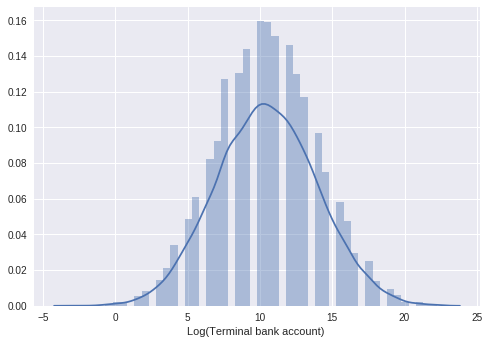

In [47]:
data = pd.Series(np.log(terminal_bank_account_results), name = "Log(Terminal bank account) ")
sns.distplot(data)
plt.show()